### Homework Rakamin Trial Class - Mini Case

# Mengukur Performa Penjualan Ritel Online

## Load Data

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/online_retail_II.csv')
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


## Section 1

### Create New Feature: Year

In [16]:
df['Year'] = pd.DatetimeIndex(df['InvoiceDate']).year
df['Year']

0          2009
1          2009
2          2009
3          2009
4          2009
           ... 
1067366    2011
1067367    2011
1067368    2011
1067369    2011
1067370    2011
Name: Year, Length: 1067371, dtype: int64

### Filtering Data

In [24]:
sales = df[(df['Quantity'] >= 1) & (df['Invoice'].str.contains('C')==False)]
sales

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


### Create New Feature: Revenue

In [27]:
df['Revenue'] = df['Quantity'] * df['Price']
df['Revenue']

0           83.40
1           81.00
2           81.00
3          100.80
4           30.00
            ...  
1067366     12.60
1067367     16.60
1067368     16.60
1067369     14.85
1067370     18.00
Name: Revenue, Length: 1067371, dtype: float64

### Average of Revenue per Year

In [28]:
average_revenue_per_year = df['Revenue'].groupby(df['Year']).mean()
average_revenue_per_year

Year
2009    17.684777
2010    18.152555
2011    18.018195
Name: Revenue, dtype: float64

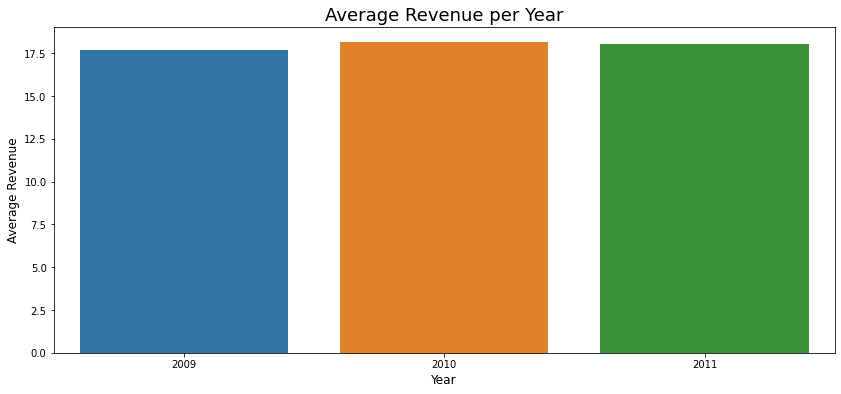

In [32]:
plt.figure(figsize=(14, 6))
sns.barplot(x=average_revenue_per_year.index, y=average_revenue_per_year.values)
plt.title('Average Revenue per Year', fontsize=18)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Revenue', fontsize=12)
plt.show()

In [35]:
print('Average Revenue:', round(df['Revenue'].mean(), 2))

Average Revenue: 18.07


### Interpretation

Dari grafik diatas dapat terlihat bahwa rata-rata revenue tertinggi terdapat pada tahun 2010. Sedangkan rata-rata revenue terendah terdapat pada tahun 2009. Rata-rata revenue per tahun berkisar di angka 17.68 - 18.15      

Perlu dicermati penjualan pada tahun 2011, karena mengalami penurunan rata-rata revenue dari tahun 2010.




## Section 2

### Filtering Data 

#### Customers who finished their purchases

In [43]:
finished = sales[sales['Customer ID'].notnull()]
finished

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


#### Customers who canceled their purchases

In [46]:
cancel = df[df['Invoice'].str.contains('C')]
cancel

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009,-35.40
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009,-9.90
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009,-17.00
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009,-12.60
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009,-35.40
...,...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011,-9.13
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011,-224.69
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011,-54.75
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011,-1.25


### Number of Finished and Canceled Transactions Each Year

In [52]:
finised_transaction_per_year = finished['Invoice'].groupby(finished['Year']).count()
finised_transaction_per_year

Year
2009     30761
2010    403094
2011    371765
Name: Invoice, dtype: int64

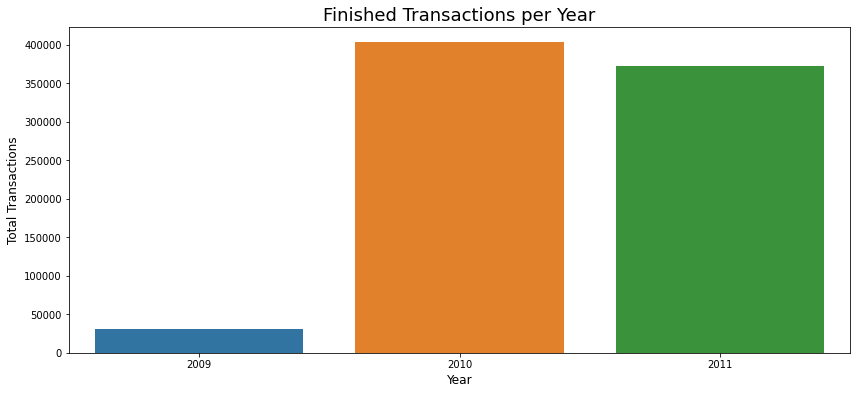

In [53]:
plt.figure(figsize=(14, 6))
sns.barplot(x=finised_transaction_per_year.index, y=finised_transaction_per_year.values)
plt.title('Finished Transactions per Year', fontsize=18)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Transactions', fontsize=12)
plt.show()

In [54]:
cancel_transaction_per_year = cancel['Invoice'].groupby(cancel['Year']).count()
cancel_transaction_per_year

Year
2009    1015
2010    9919
2011    8560
Name: Invoice, dtype: int64

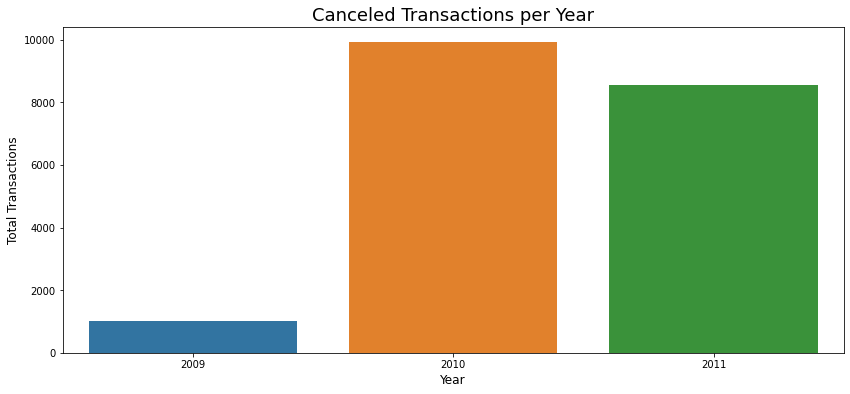

In [55]:
plt.figure(figsize=(14, 6))
sns.barplot(x=cancel_transaction_per_year.index, y=cancel_transaction_per_year.values)
plt.title('Canceled Transactions per Year', fontsize=18)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Transactions', fontsize=12)
plt.show()

### Cancellation Rate

In [63]:
cancel_2009 = cancel[cancel['Year']==2009]['Invoice'].count()
cancel_2010 = cancel[cancel['Year']==2010]['Invoice'].count()
cancel_2011 = cancel[cancel['Year']==2011]['Invoice'].count()

total_2009 = df[df['Year']==2009]['Invoice'].count()
total_2010 = df[df['Year']==2010]['Invoice'].count()
total_2011 = df[df['Year']==2011]['Invoice'].count()

cr_2009 = round(cancel_2009/total_2009*100, 2)
cr_2010 = round(cancel_2010/total_2010*100, 2)
cr_2011 = round(cancel_2009/total_2011*100, 2)

cr = [cr_2009, cr_2010, cr_2011]
year = [2009, 2010, 2011]

print('Cancellation rate 2009 =', cr_2009, '%')
print('Cancellation rate 2010 =', cr_2010, '%')
print('Cancellation rate 2011 =', cr_2011, '%')

Cancellation rate 2009 = 2.24 %
Cancellation rate 2010 = 1.9 %
Cancellation rate 2011 = 0.2 %


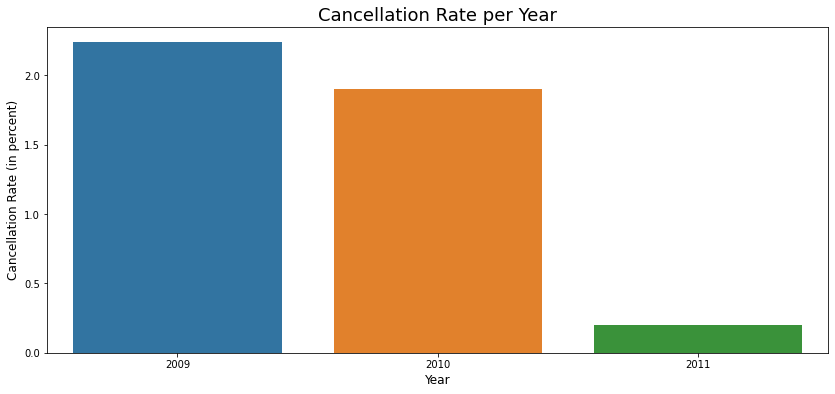

In [65]:
plt.figure(figsize=(14, 6))
sns.barplot(x=year, y=cr)
plt.title('Cancellation Rate per Year', fontsize=18)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cancellation Rate (in percent)', fontsize=12)
plt.show()

### Interpretation

Berdasarkan grafik transaksi yang dibatalkan dan transaksi yang berhasil:
- Setiap tahunnya transaksi yang berhasil selalu lebih banyak dibandingkan yang dibatalkan.
- Pada grafik transaksi yang berhasil terlihat bahwa pada tahun 2010 terjadi kenaikan yang signifikan dibandingkan dengan tahun sebelumnya. Namun, di tahun 2011 terjadi sedikit penurunan.
- Pada grafik transaksi yang dibatalkan pun terlihat terjadi kenaikan signifikan pada tahun 2010. Namun, pada tahun 2011 kembali terjadi sedikit penurunan.
- Kenaikan pada transaksi yang berhasil diikuti juga dengan kenaikan pada transaksi yang dibatalkan. Begitupun penurunan pada transaksi yang berhasil diikuti juga dengan penurunan pada transaksi yang dibatalkan.          

Berdasarkan grafik cancellation rate:
- Cancellation rate dari 2009 hingga 2011 terus menurun angkanya. Hal ini merupakan suatu pertanda bagus karena dapat mengurangi jumlah transaksi yang dibatalkan setiap tahunnya.
- Pada tahun 2011, angka cancellation rate menurun dengan signifikan dibanding pada tahun sebelumnya. Hal ini menunjukkan strategi yang diterapkan untuk mengurangi transaksi dibatalkan sudah dapat berjalan dengan baik. 